In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
uber=pd.read_csv('UberDataset.csv')
uber.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [125]:
uber.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [126]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


### Checking for missing values


In [127]:
uber.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

### Checking for duplicate values


In [128]:
uber.duplicated().sum()

1

### Checking for unique values


In [129]:
uber.nunique()

START_DATE    1155
END_DATE      1154
CATEGORY         2
START          177
STOP           188
MILES          257
PURPOSE         10
dtype: int64

### solve the problem of missing values


In [130]:
uber['PURPOSE'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [131]:
uber['PURPOSE'].fillna(method='ffill',inplace=True)

In [132]:
uber.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


### solve start and end date and time converting to datetime


In [133]:
uber['START_DATE'] = pd.to_datetime(uber['START_DATE'],errors='coerce')
uber['END_DATE'] = pd.to_datetime(uber['END_DATE'],errors='coerce')

In [134]:
uber.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit


### seperate the date and time and month and year


In [135]:
# seperate the date and time and month and year
uber['start_date'] = uber['START_DATE'].dt.date
uber['start_time'] = uber['START_DATE'].dt.time
uber['end_date'] = uber['END_DATE'].dt.date
uber['end_time'] = uber['END_DATE'].dt.time
uber['month'] = uber['START_DATE'].dt.month
uber['year'] = uber['START_DATE'].dt.year


In [136]:
uber.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start_date,start_time,end_date,end_time,month,year
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00,2016-01-01,21:17:00,1.0,2016.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,2016-01-02,01:25:00,2016-01-02,01:37:00,1.0,2016.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25:00,2016-01-02,20:38:00,1.0,2016.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17:31:00,2016-01-05,17:45:00,1.0,2016.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14:42:00,2016-01-06,15:49:00,1.0,2016.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06,17:15:00,2016-01-06,17:19:00,1.0,2016.0
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,2016-01-06,17:30:00,2016-01-06,17:35:00,1.0,2016.0
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,2016-01-07,13:27:00,2016-01-07,13:33:00,1.0,2016.0
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,2016-01-10,08:05:00,2016-01-10,08:25:00,1.0,2016.0
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,2016-01-10,12:17:00,2016-01-10,12:44:00,1.0,2016.0


### remove START_DATE END_DATE and rearrange the columns


In [137]:
uber.drop(['START_DATE','END_DATE'],axis=1,inplace=True)
uber = uber[['start_date','start_time','end_date','end_time','month','year','CATEGORY','START','STOP','MILES','PURPOSE']]

In [138]:
uber.month.value_counts()

12.0    146
8.0     133
11.0    122
2.0     115
3.0     113
7.0     112
6.0     108
10.0    106
1.0      61
4.0      54
5.0      49
9.0      36
Name: month, dtype: int64

In [139]:
uber.month.isnull().sum()

1

### convert month to integer


In [143]:
# uber.month.fillna(fill,inplace=True)
uber['month'] = uber['month'].fillna(uber['month'].mode()[0])
uber['month'] = uber['month'].astype(int)


In [144]:
uber.head(10)

,start_date,start_time,end_date,end_time,month,year,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01,21:11:00,2016-01-01,21:17:00,1,2016.0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02,01:25:00,2016-01-02,01:37:00,1,2016.0,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02,20:25:00,2016-01-02,20:38:00,1,2016.0,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05,17:31:00,2016-01-05,17:45:00,1,2016.0,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06,14:42:00,2016-01-06,15:49:00,1,2016.0,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06,17:15:00,2016-01-06,17:19:00,1,2016.0,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,2016-01-06,17:30:00,2016-01-06,17:35:00,1,2016.0,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,2016-01-07,13:27:00,2016-01-07,13:33:00,1,2016.0,Business,Cary,Cary,0.8,Meeting
8,2016-01-10,08:05:00,2016-01-10,08:25:00,1,2016.0,Business,Cary,Morrisville,8.3,Meeting
9,2016-01-10,12:17:00,2016-01-10,12:44:00,1,2016.0,Business,Jamaica,New York,16.5,Customer Visit


In [145]:
uber.month.count()

1156

In [147]:
uber.month.value_counts()

12    147
8     133
11    122
2     115
3     113
7     112
6     108
10    106
1      61
4      54
5      49
9      36
Name: month, dtype: int64

### convert year to integer


In [148]:
uber['year'] = uber['year'].fillna(uber['year'].mode()[0])
uber['year'] = uber['year'].astype(int)

In [149]:
uber.dtypes

start_date     object
start_time     object
end_date       object
end_time       object
month           int32
year            int32
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [150]:
# convert start_time and end_time to hours and minutes
uber['start_hour'] = uber['start_time'].apply(lambda x: x.hour)
uber['start_minute'] = uber['start_time'].apply(lambda x: x.minute)
uber['end_hour'] = uber['end_time'].apply(lambda x: x.hour)
uber['end_minute'] = uber['end_time'].apply(lambda x: x.minute)

In [151]:
# rearrange the columns and drop start_time and end_time columns
uber = uber[['start_date','start_hour','start_minute','end_date','end_hour','end_minute','month','year','CATEGORY','START','STOP','MILES','PURPOSE']]


In [152]:
# create a new column for duration of the trip to be in minutes
uber['duration'] = uber['end_hour']*60 + uber['end_minute'] - (uber['start_hour']*60 + uber['start_minute'])



In [153]:
# convert miles to km
uber['MILES'] = uber['MILES']*1.60934
#calculate speed
uber['speed'] = uber['MILES']/(uber['duration']/60)

In [154]:
uber.head(5)

,start_date,start_hour,start_minute,end_date,end_hour,end_minute,month,year,CATEGORY,START,STOP,MILES,PURPOSE,duration,speed
0,2016-01-01,21.0,11.0,2016-01-01,21.0,17.0,1,2016,Business,Fort Pierce,Fort Pierce,8.207634,Meal/Entertain,6.0,82.076340
1,2016-01-02,1.0,25.0,2016-01-02,1.0,37.0,1,2016,Business,Fort Pierce,Fort Pierce,8.046700,Meal/Entertain,12.0,40.233500
2,2016-01-02,20.0,25.0,2016-01-02,20.0,38.0,1,2016,Business,Fort Pierce,Fort Pierce,7.724832,Errand/Supplies,13.0,35.653071
3,2016-01-05,17.0,31.0,2016-01-05,17.0,45.0,1,2016,Business,Fort Pierce,Fort Pierce,7.563898,Meeting,14.0,32.416706
4,2016-01-06,14.0,42.0,2016-01-06,15.0,49.0,1,2016,Business,Fort Pierce,West Palm Beach,102.514958,Customer Visit,67.0,91.804440


In [155]:
uber.describe()

,start_hour,start_minute,end_hour,end_minute,month,year,MILES,duration,speed
count,1155.000000,1155.000000,1155.000000,1155.000000,1156.000000,1156.0,1156.000000,1155.000000,1155.000000
mean,14.696104,29.128139,14.794805,28.994805,6.987024,2016.0,33.981854,5.788745,inf
std,4.575226,17.191727,4.775222,17.547755,3.546452,0.0,578.234265,154.891874,NaN
min,0.000000,0.000000,0.000000,0.000000,1.000000,2016.0,0.804670,-1432.000000,-17.107984
25%,12.000000,14.000000,12.000000,14.000000,3.750000,2016.0,4.667086,10.000000,23.571879
50%,15.000000,29.000000,15.000000,29.000000,7.000000,2016.0,9.656040,16.000000,33.357229
75%,18.000000,44.000000,18.000000,44.000000,10.000000,2016.0,16.737136,27.000000,45.622351
max,23.000000,59.000000,23.000000,59.000000,12.000000,2016.0,19641.511898,330.000000,inf


In [171]:
# found problem in speed that have negative value
uber[uber["speed"]==-17.10798391304348]

,start_date,start_hour,start_minute,end_date,end_hour,end_minute,month,year,CATEGORY,START,STOP,MILES,PURPOSE,duration,speed
776,2016-09-27,21.0,1.0,2016-09-28,2.0,37.0,9,2016,Business,Unknown Location,Unknown Location,314.786904,Temporary Site,-1104.0,-17.107984


In [170]:
uber.speed.min()

-17.10798391304348

### Visualizing the data

C:\Users\Mega\AppData\Local\Temp\ipykernel_9084\997425509.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(uber.corr(),annot=True)
c:\Users\Mega\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


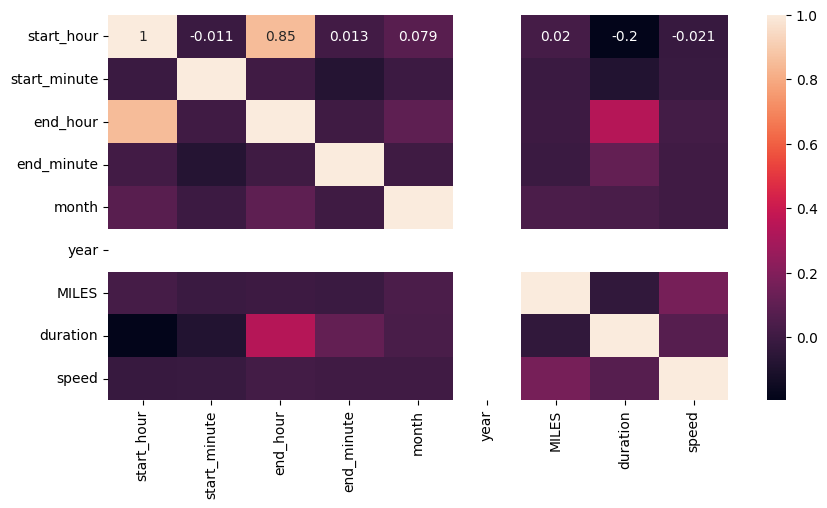

In [163]:
# plot the heatmap
plt.figure(figsize=(10,5))
sns.heatmap(uber.corr(),annot=True)
plt.show()

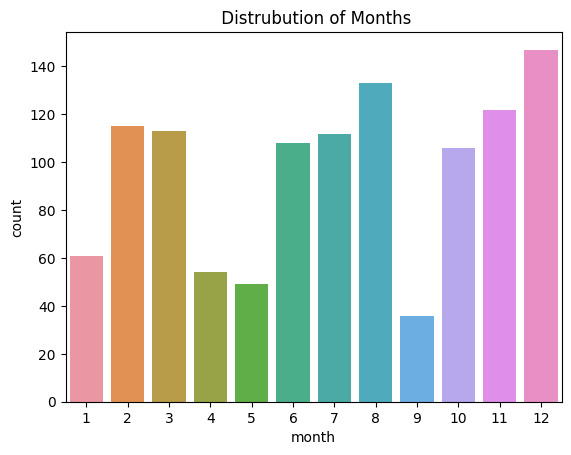

In [167]:
sns.countplot(x='month',data=uber)
plt.title(" Distrubution of Months")
plt.show()

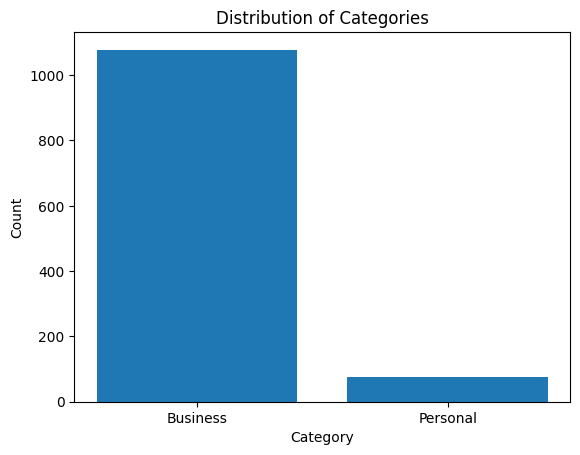

In [160]:
# Count the occurrences of each category
category_counts = uber['CATEGORY'].value_counts()

# Create a bar plot
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.show()

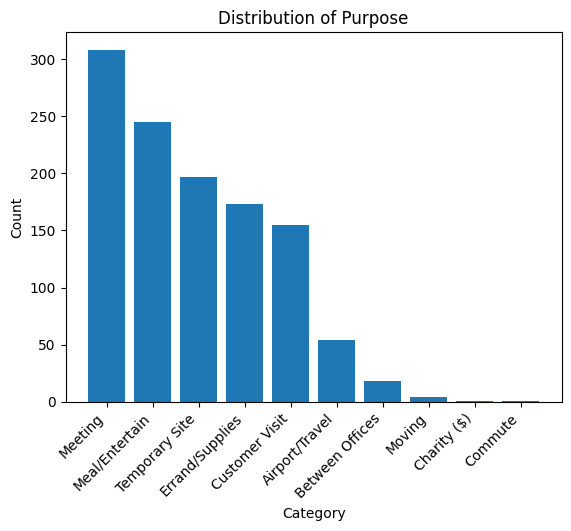

In [161]:
# Count the occurrences of each purpose
purpose_counts = uber['PURPOSE'].value_counts()

# Create a bar plot
plt.bar(purpose_counts.index, purpose_counts.values)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Purpose')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

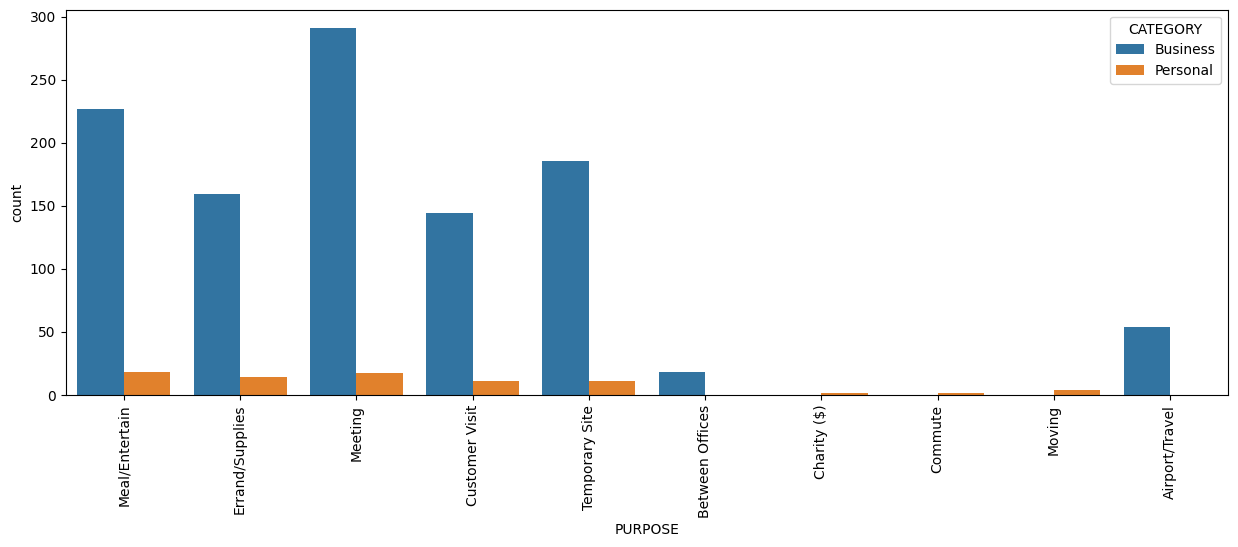

In [162]:

plt.figure(figsize=(15, 5))
sns.countplot(data=uber, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()